In [1]:
# object detection in video
import cv2
import matplotlib.pyplot as plt


In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model ='frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,  config_file) 

In [4]:
classLabels = []
file_names = 'labels.txt'
with open(file_names, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127,5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001EE52BF11B0>

In [7]:
# video

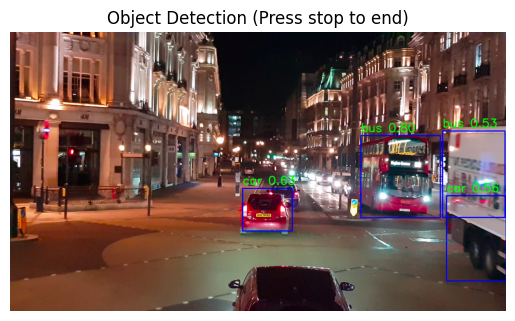

Stopped by user


In [10]:
import cv2
import time
from matplotlib import pyplot as plt
from IPython.display import clear_output

cap = cv2.VideoCapture('video_for_object_detection.mp4')
if not cap.isOpened():
    raise IOError("Cannot open the video file")

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_resized = cv2.resize(frame, (1280, 720)) 

        # Perform detection
        classIndex, confidence, bbox = model.detect(frame_resized, confThreshold=0.5) 

        if len(classIndex) != 0:
            for classInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
                if 1 <= classInd <= len(classLabels) and conf > 0.4:
                    label = classLabels[classInd - 1]
                    x, y, w, h = boxes
                    cv2.rectangle(frame_resized, (x, y), (x + w, y + h), (255, 0, 0), 2)
                    cv2.putText(frame_resized, f"{label} {conf:.2f}", (x, y - 10), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Display frame using matplotlib
        frame_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.title("Object Detection (Press stop to end)")
        plt.show()

        time.sleep(0.05)  # simulate frame delay (20 FPS)

except KeyboardInterrupt:
    print("Stopped by user")

cap.release()
